In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# read data from csv file
data = pd.read_csv("cal-housing.csv")

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
val = data['ocean_proximity'].value_counts()
print(val)
for n in val:
    print(n/len(data))

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
0.44263565891472867
0.31739341085271316
0.12877906976744186
0.11094961240310078
0.00024224806201550387


In [5]:
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C07FD588>,
      dtype=object)

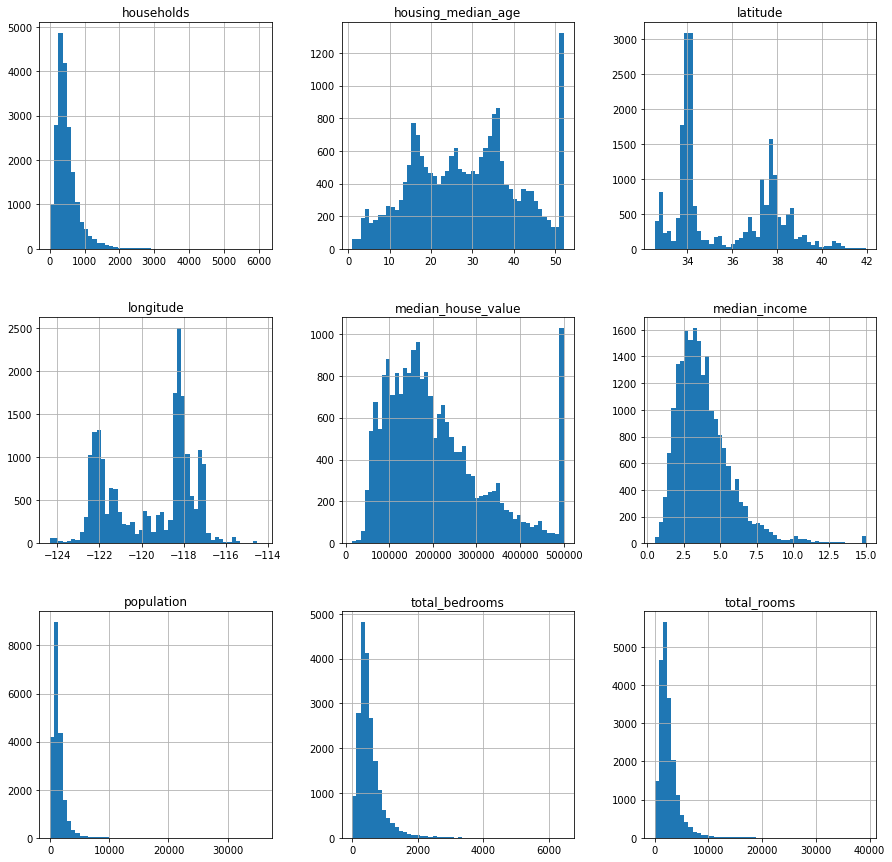

In [6]:
data.hist(bins=50, figsize=(15,15))


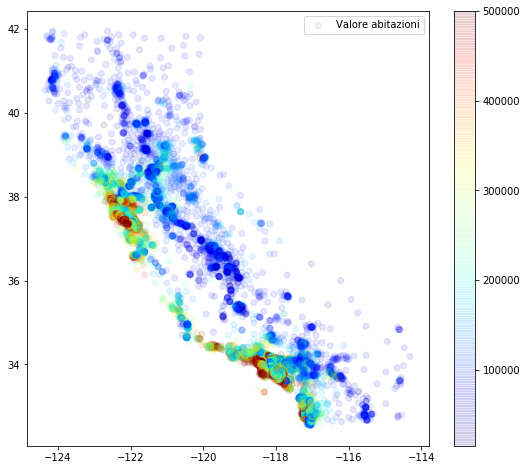

In [7]:
plt.figure(figsize=(9,8))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1,c=data['median_house_value'],cmap=plt.get_cmap("jet"),label='Valore abitazioni')
plt.colorbar()
plt.legend()

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


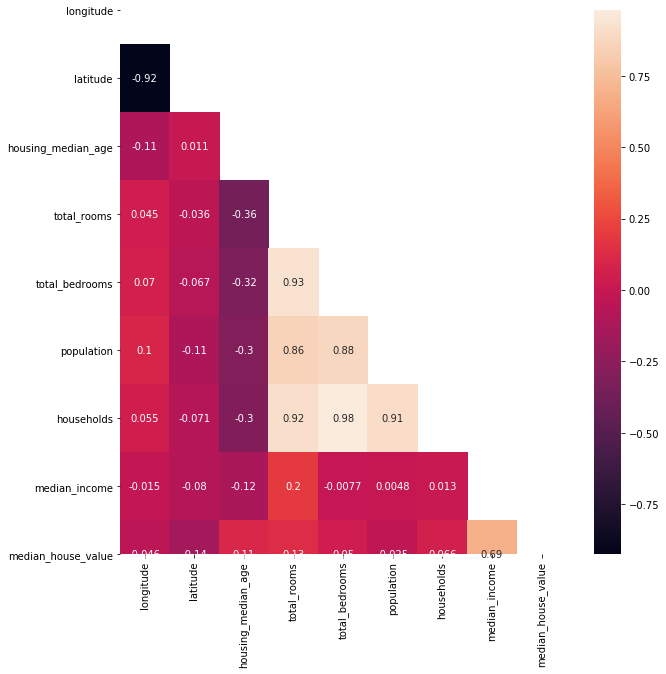

In [8]:
def get_corr_data(data):
    corr_matrix = data.corr(method='pearson')
    print(corr_matrix['median_house_value'].sort_values(ascending=False))

def get_corr_heatmap(data):
    corr_matrix = data.corr(method='pearson')
    plt.figure(figsize=(10,10))
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, mask=mask, annot=True)
    

get_corr_data(data)


get_corr_heatmap(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C403B908>,
      dtype=object)

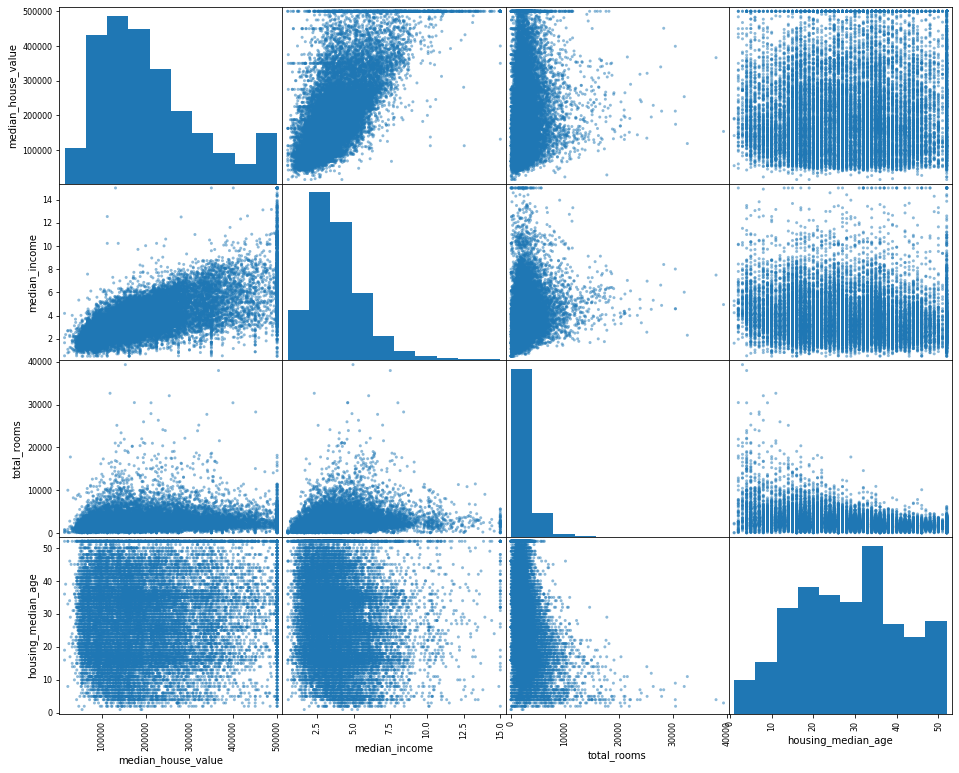

In [9]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(data[attributes], figsize=(16,13))

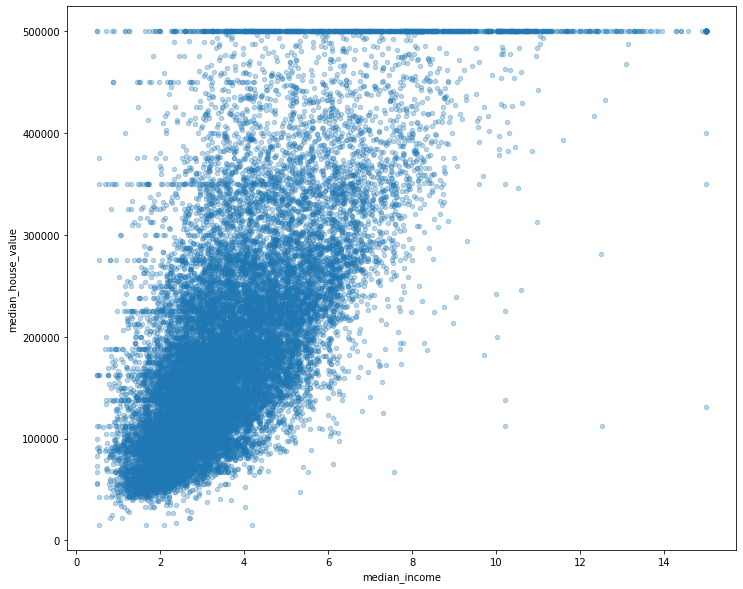

In [10]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3, figsize=(12,10))

Guardiamo meglio il contenuto delle nostre colonne

In [11]:
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total 
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

report_missing_data(data)

                    Total  Percent
total_bedrooms        207      1.0
ocean_proximity         0      NaN
median_house_value      0      NaN
median_income           0      NaN
households              0      NaN
population              0      NaN
total_rooms             0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN


Dato che abbiamo soltanto l'1% delle entry nella colonna total_bedrooms contiene valori NaN possiamo sostiuire questi con la media della colonna stessa

In [12]:
data = data.fillna(data.median())

Creiamo delle nuove colonne a partire dai dati che già abbiamo. Dato che i dati in una riga sono relativi ad un insieme di case possiamo calcolare i rapporti tra (numero di stanze/numero di abitazioni), (popolazione del lotto/numero di abitazioni) e (numero di camere da letto/numero di stanze)

In [13]:
data['rooms_per_household']=data['total_rooms']/data['households']
data['population_per_household']=data['population']/data['households']
data['bedrooms_per_room']=data['total_bedrooms']/data['total_rooms']
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


# Data skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C5091508>,
      dtype=object)

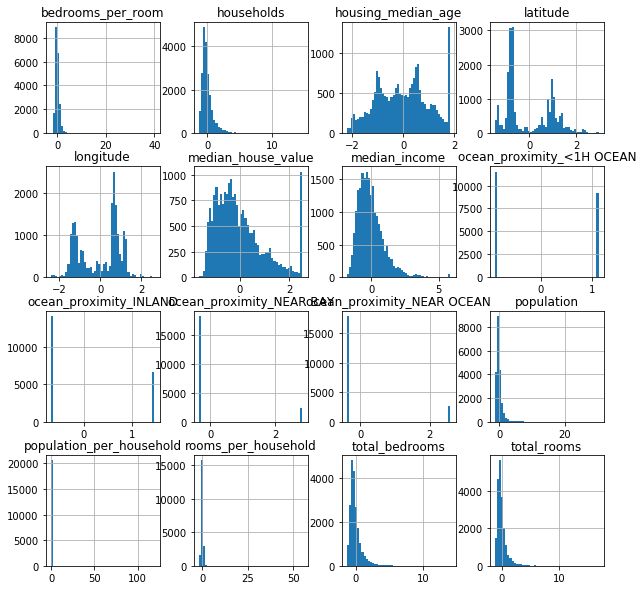

In [14]:
def normalize(X):
    return (X - X.mean())/X.std()

data1 = data.replace("ISLAND", "NEAR OCEAN").copy()
data1 = pd.get_dummies(data1)
data1 = normalize(data1)

data1.hist(bins=50, figsize=(10,10))

In [15]:
features= data1.columns
skewness=[]
for i in features:
    skewness.append([data1[i].skew()])
stock = pd.DataFrame(data=skewness,index=features,columns=['stock'])
stock

,stock
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.481141
population,4.935858
households,3.410438
median_income,1.646657
median_house_value,0.977763
rooms_per_household,20.697869


In [16]:
data_no_skw = data1.copy()
data_no_skw1 = data1.copy()
data_no_skw2 = data1.copy()

features=['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']
for i in features:
    data_no_skw[i] = np.log(data_no_skw[i])
    data_no_skw1[i] = np.sqrt(data_no_skw1[i])
    data_no_skw2[i] = np.reciprocal(data_no_skw2[i])
skewness=[]
skewness1=[]
skewness2=[]
for i in features:
    skewness.append(data_no_skw[i].skew())
    skewness1.append(data_no_skw1[i].skew())
    skewness2.append(data_no_skw2[i].skew())

tab = pd.DataFrame(list(zip(skewness , skewness1, skewness2)), index=features, columns=['log','sqrt','inv'])
tab = pd.concat([stock , tab] , axis = 1)
tab

C:\Users\Nicolas Facchinetti\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nicolas Facchinetti\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,stock,log,sqrt,inv
longitude,-0.297801,NaN,NaN,NaN
latitude,0.465953,NaN,NaN,NaN
housing_median_age,0.060331,NaN,NaN,NaN
total_rooms,4.147343,-0.886773,1.441347,41.040489
total_bedrooms,3.481141,-0.990264,1.252236,24.576227
population,4.935858,-0.804242,1.396254,-9.114554
households,3.410438,-0.859102,1.250441,3.112243
median_income,1.646657,-1.031267,0.800225,-57.933202
median_house_value,0.977763,NaN,NaN,NaN
rooms_per_household,20.697869,-0.888753,3.918047,51.049573


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C7BA8088>,
      dtype=object)

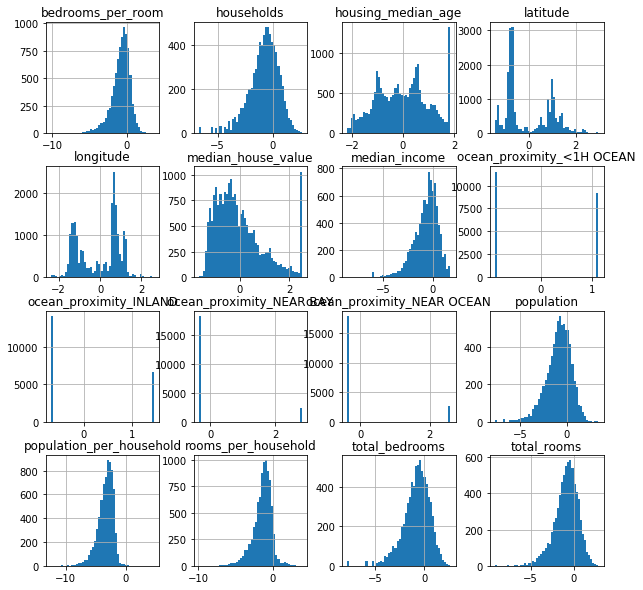

In [17]:
data_no_skw.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C8DE2E08>,
      dtype=object)

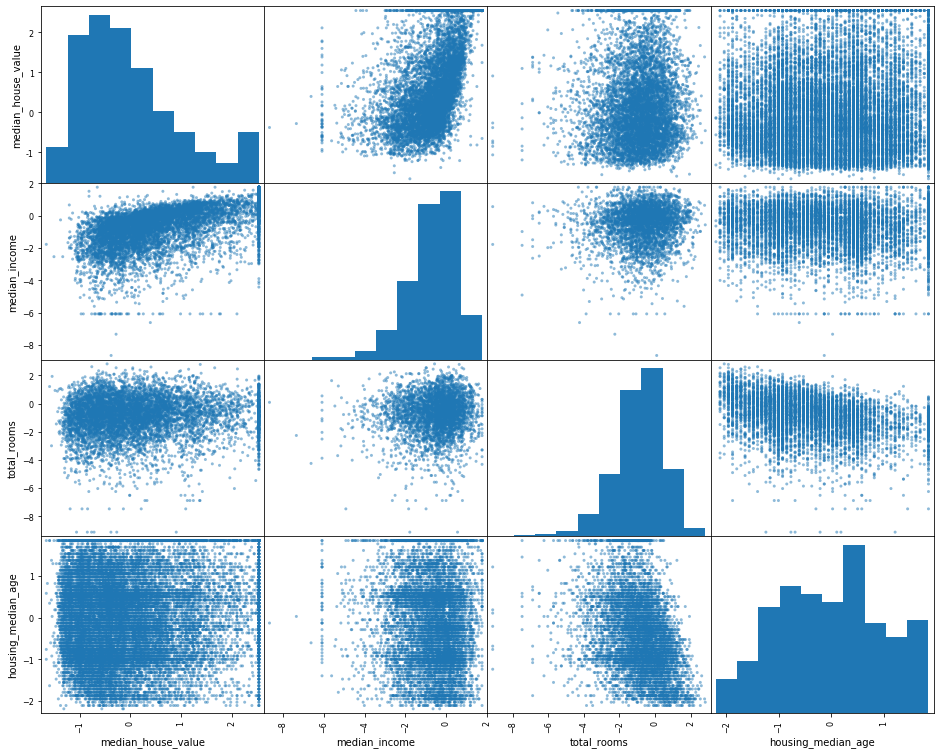

In [18]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(data_no_skw[attributes], figsize=(16,13))

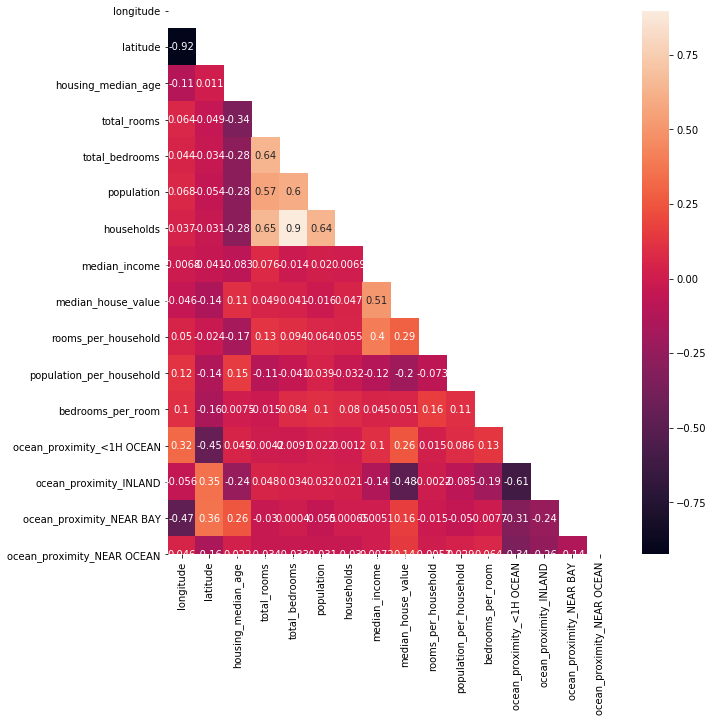

In [19]:

get_corr_heatmap(data_no_skw)

## Principal Component Analisys

Togliamo i valoi NaN dal dataset e rimuoviamo la colonna da predirre

In [28]:
from transform import PCA

data2 = data1.dropna().copy()
data2 = data2.drop("median_house_value", axis =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   rooms_per_household         20640 non-null  float64
 9   population_per_household    20640 non-null  float64
 10  bedrooms_per_room           20640 non-null  float64
 11  ocean_proximity_<1H OCEAN   20640 non-null  float64
 12  ocean_proximity_INLAND      20640 non-null  float64
 13  ocean_proximity_NEAR BAY    206

Calcoliamo al somma della varianza ottenuta dagli eigenvalues

In [34]:
pca = PCA(data2)
variance = pca.get_percentage_of_variance()
np.cumsum(variance)

array([0.26143466, 0.43482303, 0.5625662 , 0.67316551, 0.75679386,
       0.82410782, 0.87561729, 0.91967957, 0.96090844, 0.98540763,
       0.99424055, 0.99728598, 0.99898143, 1.        , 1.        ])

Con 8 componenti possiamo spiegare il 90% della varianza nel dataset